# Вебинар 5. Обучение без учителя.

**Подключение библиотек и скриптов**

In [2]:
import numpy as np
import pandas as pd
import pickle

from scipy.spatial.distance import cdist
from mpl_toolkits.mplot3d.axes3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [35]:
matplotlib.rcParams.update({'font.size': 12})

In [33]:
def apply_elbow_method(X):
    """
    Функция для оценки оптимального кол-ва кластеров методом локтя
    """
    distortions = []
    K = range(2,15)
    for k in K:
        kmeanModel = KMeans(n_clusters=k, random_state=33).fit(X)
        distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

    plt.figure(figsize=(10, 8))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

In [36]:
def display_clusters_distribution(unique_labels, labels_counts):
    """
    Функция для визуализации распределения объектов по кластерам
    """
    plt.figure(figsize=(8,5))
    plt.bar(unique, counts)
    plt.xlabel('Clгsters')
    plt.xticks(unique)
    plt.ylabel('Count')
    plt.title('Clusters distribution')
    plt.show()

In [37]:
def reduce_dims_with_PCA(df, n):
    """
    Функция для понижения размерности исходных данных методом PCA
    n - число компонент (доступные значения: 2, 3)
    """
    pca = PCA(n_components=n)
    components = pca.fit_transform(df)
    if n==2:
        reduced_df = pd.DataFrame(data = components, columns = ['component_1', 'component_2'])
    elif n==3:
        reduced_df = pd.DataFrame(data = components, columns = ['component_1', 'component_2', 'component_3'])
    else:
        print('Число компонент больше 3 в данной функции не поддержиается')
    return reduced_df


def reduce_dims_with_TSNE(df, n):
    """
    Функция для понижения размерности исходных данных методом tSNE
    n - число компонент (доступные значения: 2, 3)
    """
    tsne = TSNE(n_components=n, learning_rate=250, random_state=42)
    components = tsne.fit_transform(df)
    if n==2:
        reduced_df = pd.DataFrame(data = components, columns = ['component_1', 'component_2'])
    elif n==3:
        reduced_df = pd.DataFrame(data = components, columns = ['component_1', 'component_2', 'component_3'])
    else:
        print('Число компонент больше 3 в данной функции не поддержиается')
    return reduced_df

In [38]:
def display_components_in_2D_space(components_df, labels=None):
    """
    Функция для визуализации работы алгоритма понижения размерности в 2-D пространство
    """
    components_with_labels_df = pd.concat([components_df, labels], axis=1)

    if labels is not None:
        components_with_labels_df.plot(kind='scatter', x='component_1', y='component_2', 
                                         c=labels.name, cmap=plt.get_cmap('jet'),
                                         alpha=0.5, figsize=(15,10))
    else:
        components_with_labels_df.plot(kind='scatter', x='component_1', y='component_2', alpha=0.5, figsize=(15,10))

    plt.xlabel('component_1')
    plt.ylabel('component_2')
    plt.title('2D mapping of objects')    
    plt.show()

    
def display_components_in_3D_space(components_df, labels=None):
    """
    Функция для визуализации работы алгоритма понижения размерности в 3-D пространство
    """
    components_with_labels_df = pd.concat([components_df, labels], axis=1)

    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111, projection='3d')
    
    if labels is not None:
        ax.scatter(components_with_labels_df['component_1'], 
                   components_with_labels_df['component_2'], 
                   components_with_labels_df['component_3'], 
                   c=labels, cmap=plt.get_cmap('jet'), alpha=0.5)
    else:
        ax.scatter(components_with_labels_df['component_1'], 
                   components_with_labels_df['component_2'], 
                   components_with_labels_df['component_3'], 
                   alpha=0.5)

    ax.set_xlabel('component_1')
    ax.set_ylabel('component_2')
    ax.set_zlabel('component_3')
    plt.title('3D mapping of objects')
    plt.show()

In [39]:
def evaluate_preds(true_values, pred_values):
    """
    Функция для оценки и визуализции работы регрессионной модели
    """
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "MAE:\t" + str(round(mae(true_values, pred_values), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3)))
    
    plt.figure(figsize=(10,10)) 
    
    sns.scatterplot(x=pred_values, y=true_values)
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    plt.show()

**Пути к директориям и файлам**

In [81]:
TRAIN_DATASET_PATH = '../../datasets/housing_prepared.csv'
TRAIN_DATASET_EXT_PATH = '../../datasets/housing_train_ext.csv'

### Загрузка данных

**Описание датасета**

Статистические данные о ряде домов в Калифорнии, основанные на переписи 1990 года.

* **longitude** - долгота
* **latitude** - широта
* **housing_median_age** - средний возраст дома
* **total_rooms** - общее количество комнат
* **total_bedrooms** - общее количество спален
* **population** - количество проживающих
* **households** - домохозяйства
* **ocean_proximity** - близость океана
* **median_income** - средний доход
* **median_house_value** - средняя стоимость дома

In [17]:
df = pd.read_csv(TRAIN_DATASET_PATH)
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

   <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN  
0          0       0       0         1           0  
1          0       0       0         1           0  
2          0       0       0         1           0  
3          0       0       0         1           0  
4          0       0       0         1           0

In [219]:
df.shape

(20640, 14)

In [220]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
<1H OCEAN               int64
INLAND                  int64
ISLAND                  int64
NEAR BAY                int64
NEAR OCEAN              int64
dtype: object

In [21]:
list_to_float32=list(df.dtypes[df.dtypes=='float64'].index); print(len(list_to_float32))
list_to_int32=list(df.dtypes[df.dtypes=='int64'].index); print(len(list_to_int32))
list_oth=list(df.dtypes[(df.dtypes!='float64')&(df.dtypes!='int64')].index); print(len(list_oth))

df = pd.concat([df[list_oth]
              , df[list_to_float32].astype('float32')
              , df[list_to_int32].astype('int32')], axis=1)
print(df.dtypes.value_counts())
print(df.shape)

0
0
15
float32    9
int32      5
object     1
dtype: int64
(20640, 15)


In [27]:
df.drop(['ocean_proximity'], axis = 1, inplace = True)
df.dtypes

longitude             float32
latitude              float32
housing_median_age    float32
total_rooms           float32
total_bedrooms        float32
population            float32
households            float32
median_income         float32
median_house_value    float32
<1H OCEAN               int32
INLAND                  int32
ISLAND                  int32
NEAR BAY                int32
NEAR OCEAN              int32
dtype: object

In [40]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0  -1.328084  1.052685            0.998343    -0.804819       -0.972476   
1  -1.323093  1.043321           -0.620471     2.045890        1.357143   
2  -1.333076  1.038639            1.888692    -0.535746       -0.827024   
3  -1.338067  1.038639            1.888692    -0.624215       -0.719723   
4  -1.338067  1.038639            1.888692    -0.462404       -0.612423   

   population  households  median_income  median_house_value  <1H OCEAN  \
0   -0.978955   -0.977033       2.344766            452600.0          0   
1    0.878259    1.669961       2.332238            358500.0          0   
2   -0.823518   -0.843637       1.782699            352100.0          0   
3   -0.768132   -0.733781       0.932967            341300.0          0   
4   -0.761878   -0.629157      -0.012881            342200.0          0   

   INLAND  ISLAND  NEAR BAY  NEAR OCEAN  
0       0       0         1           0  
1       0       0         1           0  
2       0       0         1           0  
3       0       0         1           0  
4       0       0         1           0

### Определение признакового пространства

In [28]:
df_features = df.drop('median_house_value', axis=1)
df_features.head()

longitude   latitude  housing_median_age  total_rooms  total_bedrooms  \
0 -122.230003  37.880001                41.0        880.0           129.0   
1 -122.220001  37.860001                21.0       7099.0          1106.0   
2 -122.239998  37.849998                52.0       1467.0           190.0   
3 -122.250000  37.849998                52.0       1274.0           235.0   
4 -122.250000  37.849998                52.0       1627.0           280.0   

   population  households  median_income  <1H OCEAN  INLAND  ISLAND  NEAR BAY  \
0       322.0       126.0         8.3252          0       0       0         1   
1      2401.0      1138.0         8.3014          0       0       0         1   
2       496.0       177.0         7.2574          0       0       0         1   
3       558.0       219.0         5.6431          0       0       0         1   
4       565.0       259.0         3.8462          0       0       0         1   

   NEAR OCEAN  
0           0  
1           0  
2           0  
3           0  
4           0

In [29]:
# Масштабируйте данные с помощью StandardScaler.
from sklearn.preprocessing import StandardScaler

df_cat = df_features[df_features.columns[-5:]]
df_num = df_features[df_features.columns[:-5]]

scaler = StandardScaler()
df_features.select_dtypes(['int32', 'float32'])

df_scaled = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)

In [30]:
df_scaled = pd.concat([df_scaled, df_cat], axis=1)
df_scaled.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0  -1.328086  1.052685            0.998344    -0.804819       -0.972476   
1  -1.323093  1.043321           -0.620471     2.045890        1.357143   
2  -1.333075  1.038638            1.888691    -0.535746       -0.827024   
3  -1.338067  1.038638            1.888691    -0.624215       -0.719723   
4  -1.338067  1.038638            1.888691    -0.462404       -0.612423   

   population  households  median_income  <1H OCEAN  INLAND  ISLAND  NEAR BAY  \
0   -0.978955   -0.977033       2.344766          0       0       0         1   
1    0.878259    1.669961       2.332238          0       0       0         1   
2   -0.823518   -0.843637       1.782699          0       0       0         1   
3   -0.768132   -0.733781       0.932967          0       0       0         1   
4   -0.761878   -0.629157      -0.012881          0       0       0         1   

   NEAR OCEAN  
0           0  
1           0  
2           0  
3           0  
4           0

In [31]:
df_scaled.shape

(20640, 13)

### Понижение размерности: PCA

**Как работает PCA**

<img src="pca_1.png">

**Снижение размерности до 2х компонент**

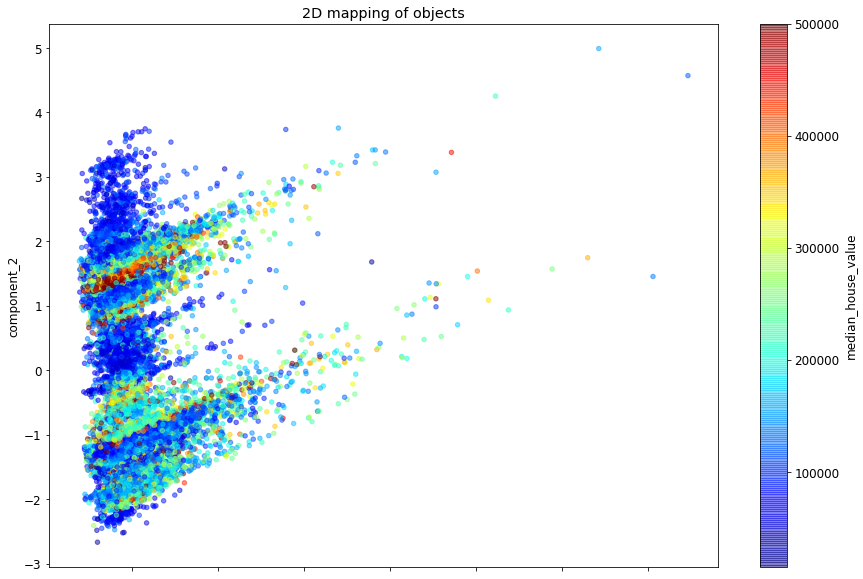

In [42]:
components_2d = reduce_dims_with_PCA(df_scaled, n=2)
display_components_in_2D_space(components_2d, df['median_house_value'])

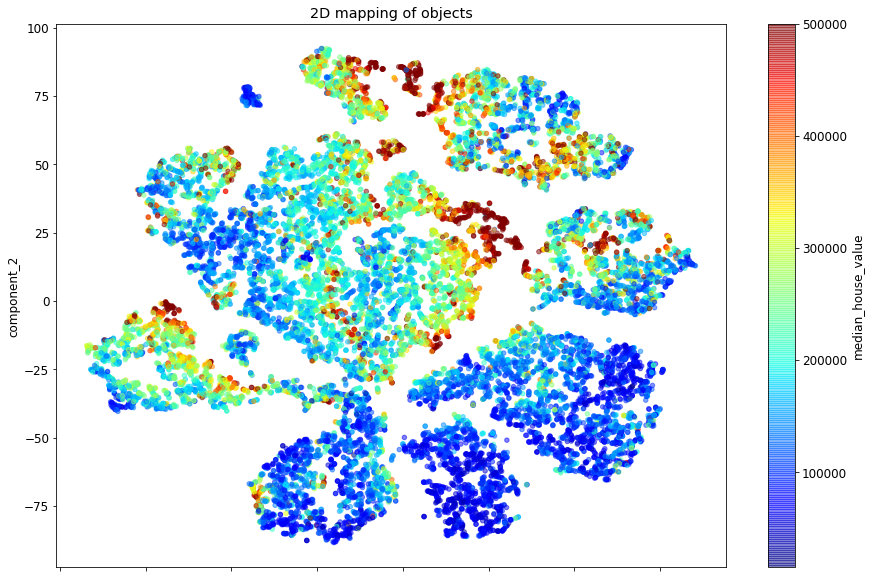

In [48]:
tsne_components_2d = reduce_dims_with_TSNE(df_scaled, n=2)
display_components_in_2D_space(tsne_components_2d, df['median_house_value'])

**Снижение размерности до 3х компонент**

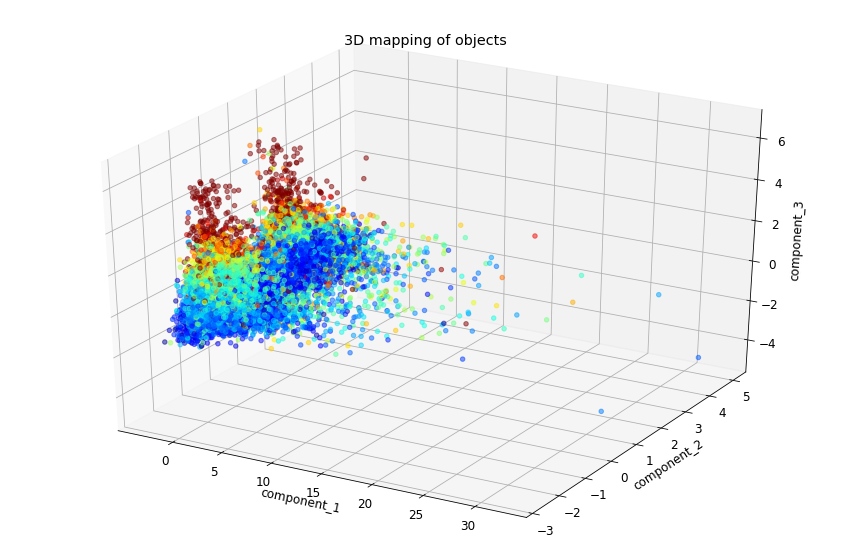

In [44]:
components_3d = reduce_dims_with_PCA(df_scaled, n=3)
display_components_in_3D_space(components_3d, df['median_house_value'])

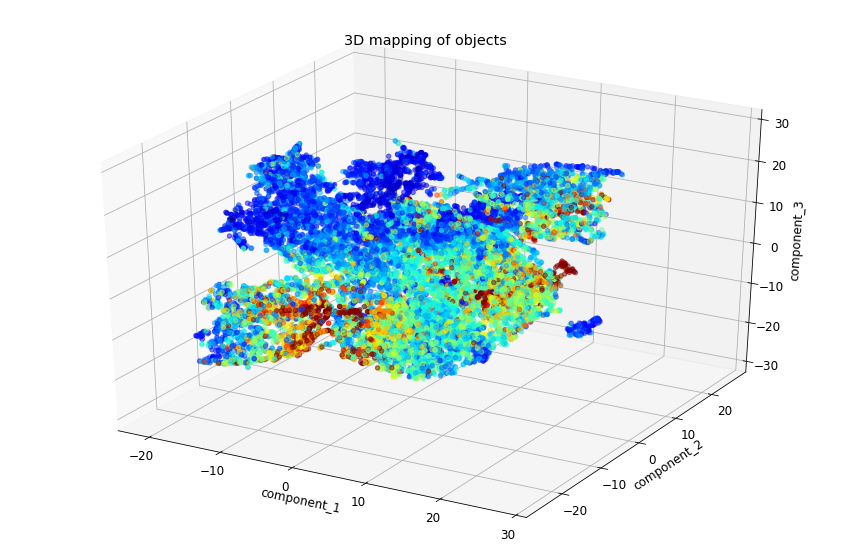

In [49]:
tsne_components_3d = reduce_dims_with_TSNE(df_scaled, n=3)
display_components_in_3D_space(tsne_components_3d, df['median_house_value'])

### Кластеризация: k-means

<img src="kmeans_v1.gif">

### Оценка оптимального количества кластеров методом "Локтя"

- Измеряется отношение внутрикластерного расстояния к межкластерному расстоянию для разного количества кластеров.  
- Когда это отношение перестаёт резко уменьшаться, полагаем, что дальше дробить пространство примеров на кластеры не имеет смысла.

<img src="kmeans_v2.gif">

In [46]:
def apply_elbow_method(X):
    """
    Функция для оценки оптимального кол-ва кластеров методом локтя
    """
    distortions = []
    K = range(2,15)
    for k in K:
        kmeanModel = KMeans(n_clusters=k, random_state=33).fit(X)
        distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

    plt.figure(figsize=(10, 8))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

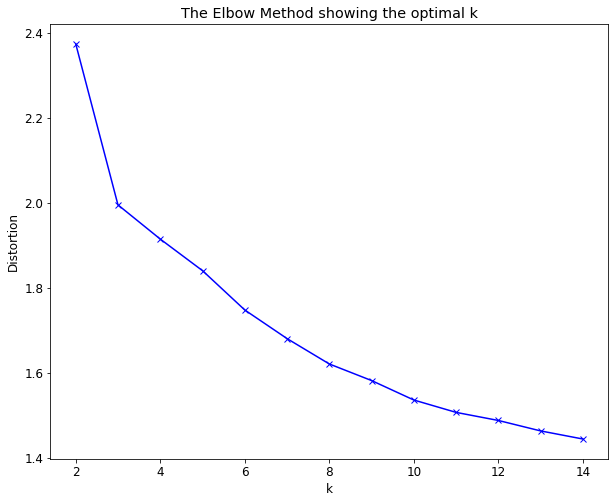

In [47]:
apply_elbow_method(df_scaled)

**Выделение 2 кластеров**

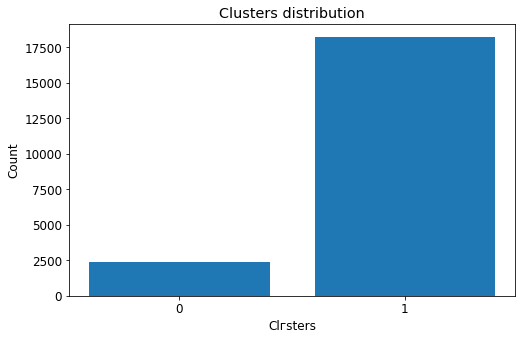

In [51]:
kmeans_2 = KMeans(n_clusters=2, random_state=33)
labels_clast_2 = kmeans_2.fit_predict(df_scaled)
labels_clast_2 = pd.Series(labels_clast_2, name='clusters_2')

unique, counts = np.unique(labels_clast_2, return_counts=True)
display_clusters_distribution(unique, counts)

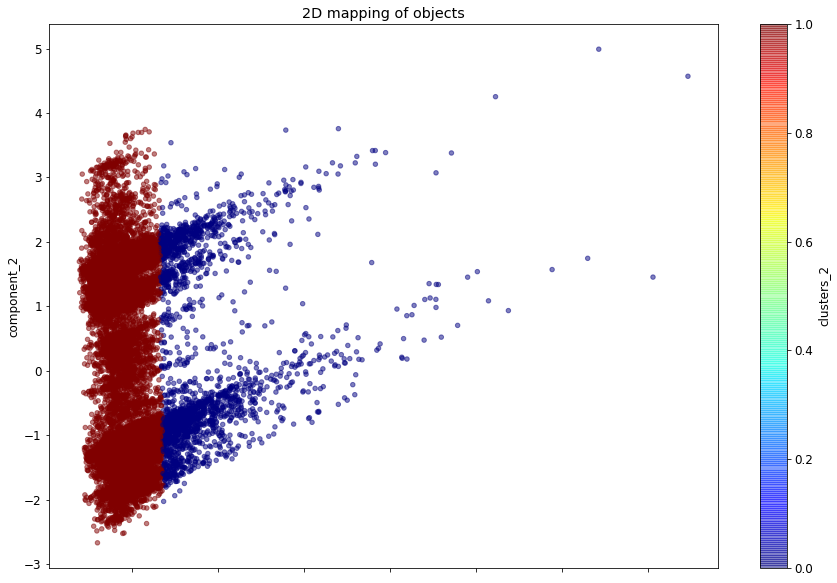

In [52]:
display_components_in_2D_space(components_2d, labels_clast_2)

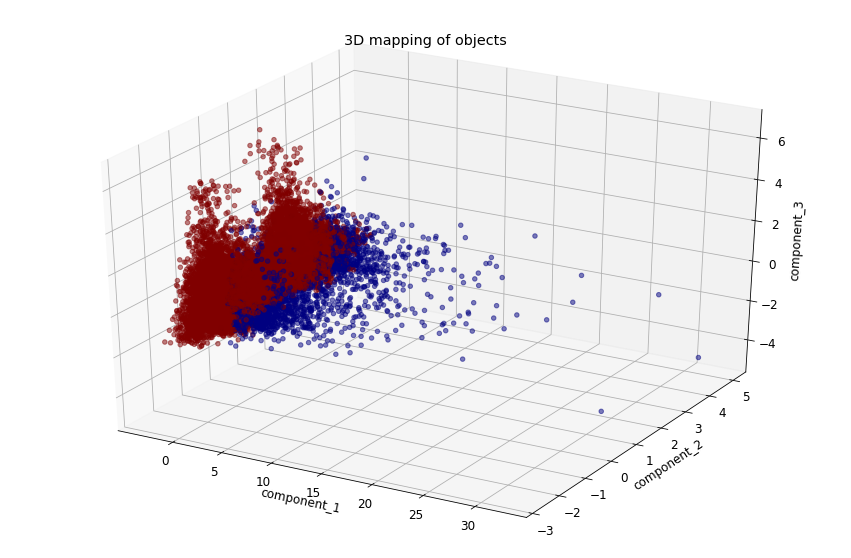

In [53]:
display_components_in_3D_space(components_3d, labels_clast_2)

# Кластеризация
### Добавление новых признаков на основании кластерного анализа

## 1. k-means

**Выделение 3 кластеров**

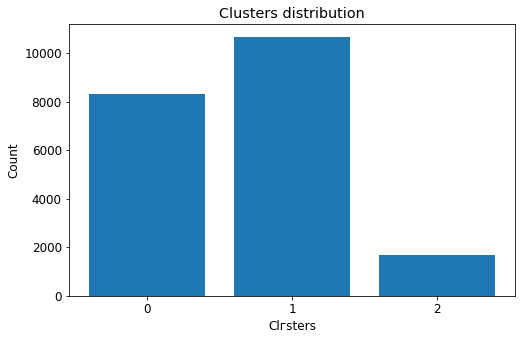

In [54]:
kmeans_3 = KMeans(n_clusters=3, random_state=33)
labels_clast_3 = kmeans_3.fit_predict(df_scaled)
labels_clast_3 = pd.Series(labels_clast_3, name='clusters_3')

unique, counts = np.unique(labels_clast_3, return_counts=True)
display_clusters_distribution(unique, counts)

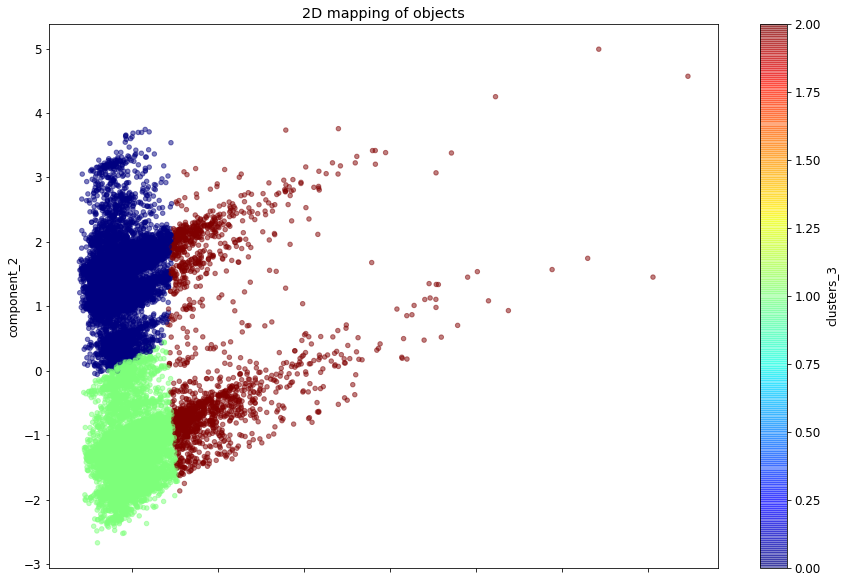

In [55]:
display_components_in_2D_space(components_2d, labels_clast_3)

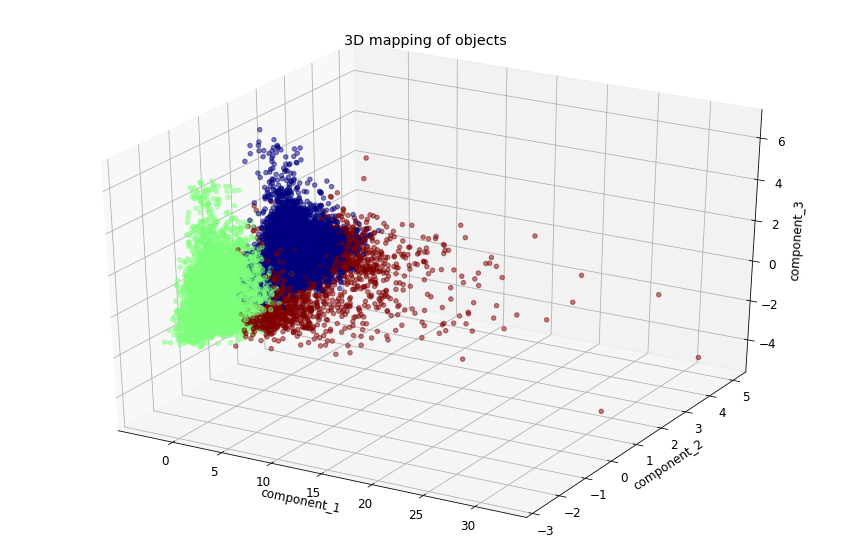

In [56]:
display_components_in_3D_space(components_3d, labels_clast_3)

**Выделение 10 кластеров**

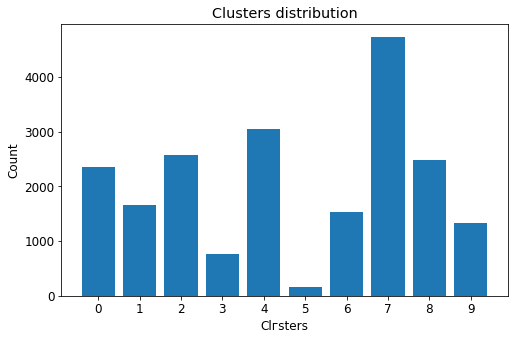

In [57]:
kmeans_10 = KMeans(n_clusters=10, random_state=33)
labels_clast_10 = kmeans_10.fit_predict(df_scaled)
labels_clast_10 = pd.Series(labels_clast_10, name='clusters_10')

unique, counts = np.unique(labels_clast_10, return_counts=True)
display_clusters_distribution(unique, counts)

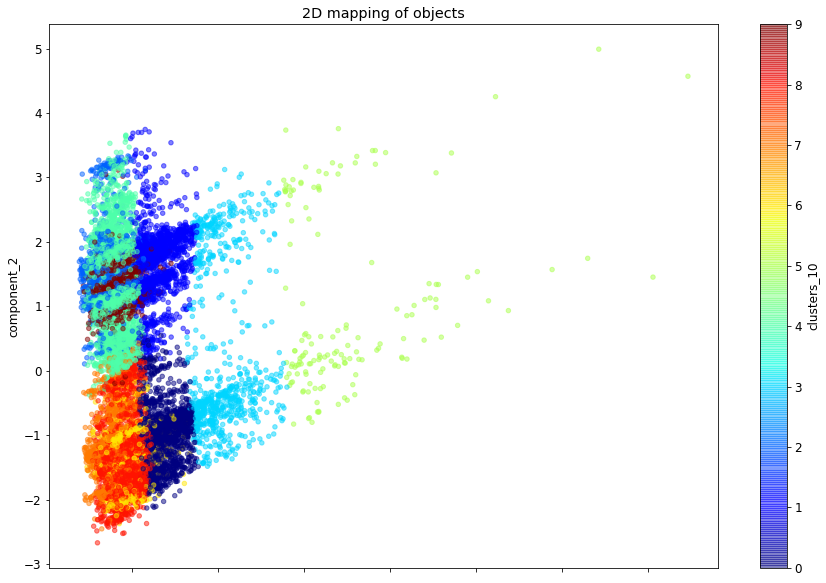

In [58]:
display_components_in_2D_space(components_2d, labels_clast_10)

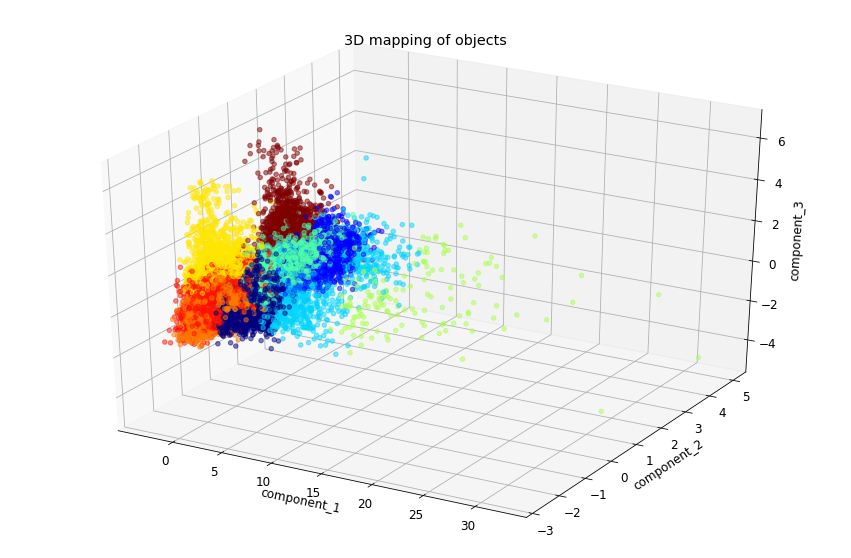

In [59]:
display_components_in_3D_space(components_3d, labels_clast_10)

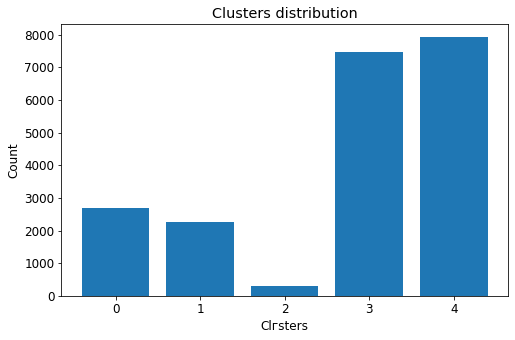

In [61]:
kmeans_5 = KMeans(n_clusters=5, random_state=33)
labels_clast_5 = kmeans_5.fit_predict(df_scaled)
labels_clast_5 = pd.Series(labels_clast_5, name='clusters_5')

unique, counts = np.unique(labels_clast_5, return_counts=True)
display_clusters_distribution(unique, counts)

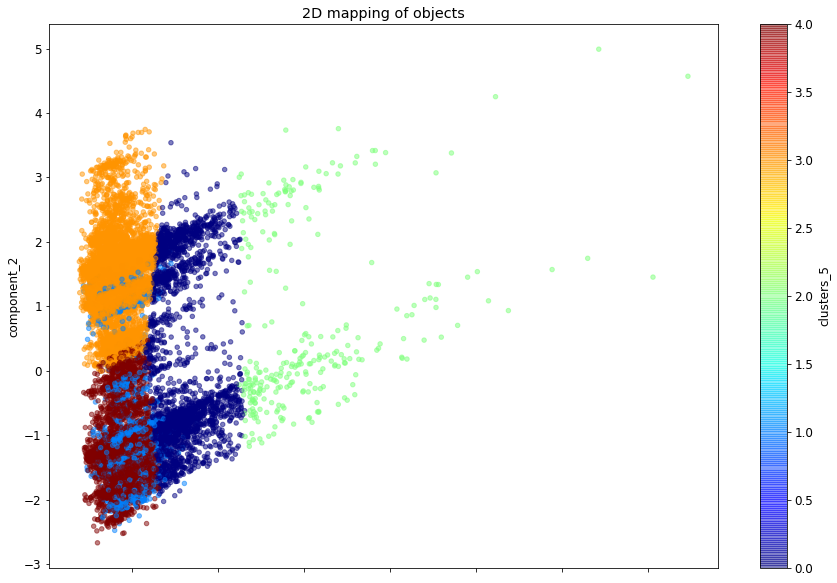

In [62]:
display_components_in_2D_space(components_2d, labels_clast_5)

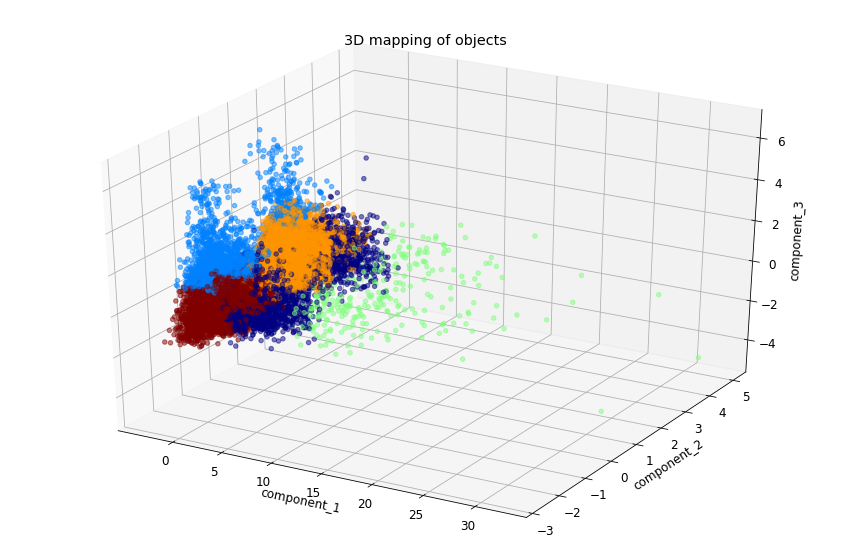

In [63]:
display_components_in_3D_space(components_3d, labels_clast_5)

### Baseline

In [64]:
X = df_scaled
y = df['median_house_value']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=21)

In [66]:
final_model = GradientBoostingRegressor(n_estimators=400, max_depth=7, random_state=21)
final_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=7,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=21, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

R2:	0.979
MAE:	12335.109
MSE:	280437069.77


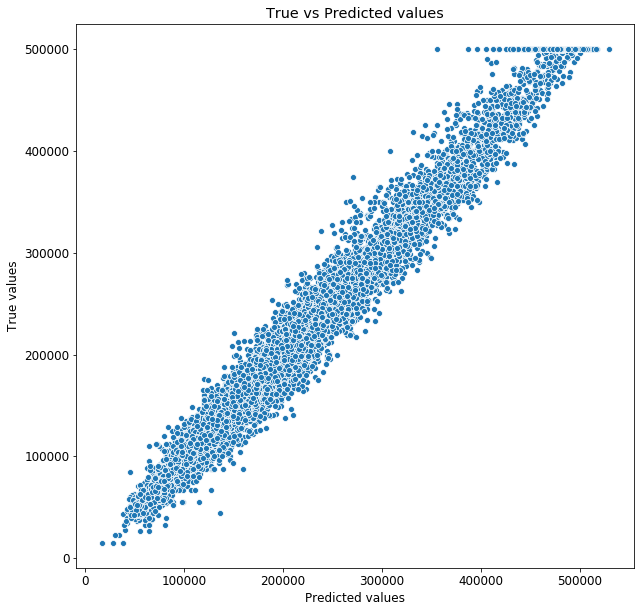

In [67]:
y_train_preds = final_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.831
MAE:	31417.262
MSE:	2274180911.416


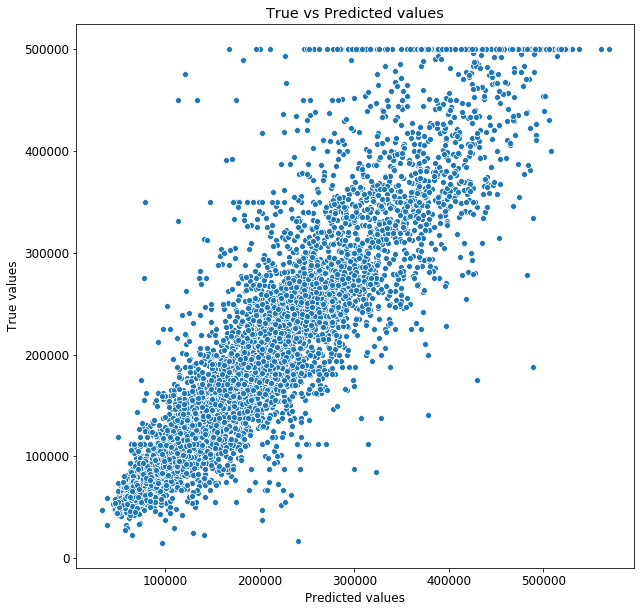

In [68]:
y_test_preds = final_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

In [69]:
feature_importances = pd.DataFrame(zip(X_train.columns, final_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

feature_name  importance
7        median_income    0.492657
9               INLAND    0.141004
0            longitude    0.105062
1             latitude    0.092757
2   housing_median_age    0.047455
5           population    0.037996
4       total_bedrooms    0.025205
3          total_rooms    0.023996
6           households    0.023410
12          NEAR OCEAN    0.006216
8            <1H OCEAN    0.002846
11            NEAR BAY    0.000915
10              ISLAND    0.000481

In [70]:
report = pd.DataFrame()
results = pd.DataFrame()

results['cluster_type'] = pd.Series('none')
results['train_r2'] = round(r2(y_train, y_train_preds), 3)
results['test_r2'] = round(r2(y_test, y_test_preds), 3)

In [71]:
report = report.append(results)
report

cluster_type  train_r2  test_r2
0         none     0.979    0.831

Смешанные Гаусовы модели

In [75]:
from sklearn.mixture import GaussianMixture
labels_gmm = {}
for i in [3,5,10]:
    gmm = GaussianMixture(n_components=i, random_state = 33)
    labels_gmm[i] = gmm.fit_predict(df_scaled)
    labels_gmm[i] = pd.Series(labels_gmm[i], name='gmm_'+str(i))

### Добавление новых признаков

In [91]:
dummies_gmm = {}
for i in [3,5,10]:
    dummies_gmm[i] = pd.get_dummies(labels_gmm[i], drop_first=True, prefix='gmm_'+str(i))
    
clusters_3_dummies = pd.get_dummies(labels_clast_3, drop_first=True, prefix='clusters_3')
clusters_5_dummies = pd.get_dummies(labels_clast_5, drop_first=True, prefix='clusters_5')
clusters_10_dummies = pd.get_dummies(labels_clast_10, drop_first=True, prefix='clusters_10')

#df_ext = pd.concat([df_scaled, components_3d, clusters_3_dummies, clusters_10_dummies, clusters_5_dummies, 
#                    dummies_gmm[3], dummies_gmm[5], dummies_gmm[10],
#                    df['median_house_value']], 
#                   axis=1)

df_pca = pd.concat([df_scaled, components_3d,
                    df['median_house_value']], 
                   axis=1)

df_km = pd.concat([df_scaled, clusters_3_dummies, clusters_10_dummies, clusters_5_dummies,
                    df['median_house_value']], 
                   axis=1)

df_gmm = pd.concat([df_scaled,
                   dummies_gmm[3], dummies_gmm[5], dummies_gmm[10],
                    df['median_house_value']], 
                   axis=1)

df_ext.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0  -1.328086  1.052685            0.998344    -0.804819       -0.972476   
1  -1.323093  1.043321           -0.620471     2.045890        1.357143   
2  -1.333075  1.038638            1.888691    -0.535746       -0.827024   
3  -1.338067  1.038638            1.888691    -0.624215       -0.719723   
4  -1.338067  1.038638            1.888691    -0.462404       -0.612423   

   population  households  median_income  <1H OCEAN  INLAND  ...  gmm_10_1  \
0   -0.978955   -0.977033       2.344766          0       0  ...         0   
1    0.878259    1.669961       2.332238          0       0  ...         0   
2   -0.823518   -0.843637       1.782699          0       0  ...         0   
3   -0.768132   -0.733781       0.932967          0       0  ...         0   
4   -0.761878   -0.629157      -0.012881          0       0  ...         0   

   gmm_10_2  gmm_10_3  gmm_10_4  gmm_10_5  gmm_10_6  gmm_10_7  gmm_10_8  \
0         0         0         0         1         0         0         0   
1         0         0         0         1         0         0         0   
2         0         0         0         1         0         0         0   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   gmm_10_9  median_house_value  
0         0            452600.0  
1         0            358500.0  
2         0            352100.0  
3         0            341300.0  
4         0            342200.0  

[5 rows x 47 columns]

### Сохранение расширенного обучающего датасета

In [82]:
df_ext.to_csv(TRAIN_DATASET_EXT_PATH, index=False, encoding='utf-8')

### Разбиение на train и test

In [92]:
X = df_ext.iloc[:, :-1]
y = df_ext.iloc[:, -1]

X_pca = df_pca.iloc[:, :-1]
y_pca = df_pca.iloc[:, -1]

X_km = df_km.iloc[:, :-1]
y_km = df_km.iloc[:, -1]

X_gmm = df_gmm.iloc[:, :-1]
y_gmm = df_gmm.iloc[:, -1]

In [93]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=21)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_pca, y_pca, test_size=0.33, shuffle=True, random_state=21)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_km, y_km, test_size=0.33, shuffle=True, random_state=21)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_gmm, y_gmm, test_size=0.33, shuffle=True, random_state=21)

### Переобучение и оценка финальной модели

In [94]:
final_model1 = GradientBoostingRegressor(n_estimators=400, max_depth=7, random_state=21)
final_model1.fit(X_train1, y_train1)

final_model2 = GradientBoostingRegressor(n_estimators=400, max_depth=7, random_state=21)
final_model2.fit(X_train2, y_train2)

final_model3 = GradientBoostingRegressor(n_estimators=400, max_depth=7, random_state=21)
final_model3.fit(X_train3, y_train3)

final_model4 = GradientBoostingRegressor(n_estimators=400, max_depth=7, random_state=21)
final_model4.fit(X_train4, y_train4)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=7,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=21, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

R2:	0.981
MAE:	11795.549
MSE:	246363740.779


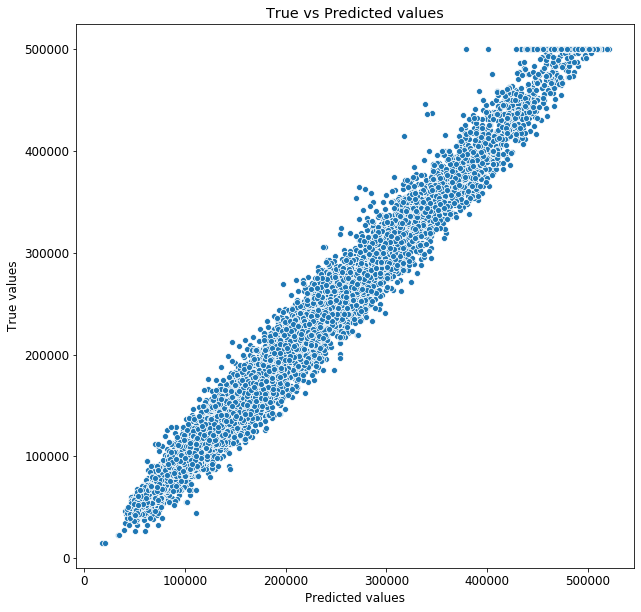

In [98]:
y_train_preds1 = final_model1.predict(X_train1)
y_train_preds2 = final_model2.predict(X_train2)
y_train_preds3 = final_model3.predict(X_train3)
y_train_preds4 = final_model4.predict(X_train4)

evaluate_preds(y_train1, y_train_preds1)

R2:	0.83
MAE:	31462.736
MSE:	2281948599.874


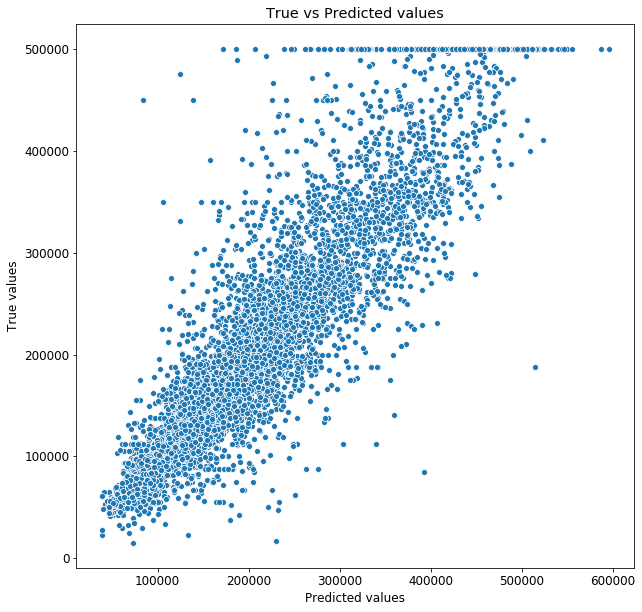

In [99]:
y_test_preds1 = final_model1.predict(X_test1)
y_test_preds2 = final_model2.predict(X_test2)
y_test_preds3 = final_model3.predict(X_test3)
y_test_preds4 = final_model4.predict(X_test4)
evaluate_preds(y_test, y_test_preds)

In [167]:
feature_importances = pd.DataFrame(zip(X_train1.columns, final_model1.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

feature_name  importance
7        median_income    0.482879
9               INLAND    0.133285
0            longitude    0.097390
1             latitude    0.086709
2   housing_median_age    0.041208
5           population    0.032380
4       total_bedrooms    0.019715
6           households    0.019504
3          total_rooms    0.017952
14         component_2    0.015943
15         component_3    0.014979
13         component_1    0.010773
40            gmm_10_4    0.006038
12          NEAR OCEAN    0.004815
35             gmm_5_3    0.003349
8            <1H OCEAN    0.001953
24       clusters_10_7    0.001722
33             gmm_5_1    0.000863
38            gmm_10_2    0.000788
36             gmm_5_4    0.000766
45            gmm_10_9    0.000699
41            gmm_10_5    0.000646
32             gmm_3_2    0.000502
30        clusters_5_4    0.000487
25       clusters_10_8    0.000459
11            NEAR BAY    0.000451
10              ISLAND    0.000423
42            gmm_10_6    0.000385
43            gmm_10_7    0.000360
23       clusters_10_6    0.000309
26       clusters_10_9    0.000303
31             gmm_3_1    0.000276
19       clusters_10_2    0.000240
21       clusters_10_4    0.000235
39            gmm_10_3    0.000230
27        clusters_5_1    0.000207
16        clusters_3_1    0.000183
18       clusters_10_1    0.000162
34             gmm_5_2    0.000128
17        clusters_3_2    0.000100
29        clusters_5_3    0.000086
20       clusters_10_3    0.000078
44            gmm_10_8    0.000026
22       clusters_10_5    0.000010
37            gmm_10_1    0.000006
28        clusters_5_2    0.000001

In [106]:
results = pd.DataFrame()

results['cluster_type'] = pd.Series('gmm')
results['train_r2'] = round(r2(y_train4, y_train_preds4), 3)
results['test_r2'] = round(r2(y_test4, y_test_preds4), 3)

In [107]:
report = report.append(results)
report

cluster_type  train_r2  test_r2
0         none     0.979    0.831
0       kmeans     0.981    0.830
0          pca     0.981    0.831
0           km     0.979    0.833
0          gmm     0.980    0.836

# DBSCAN

**Выделение 3 кластеров**

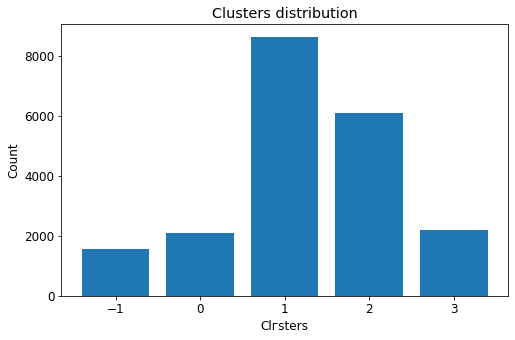

In [108]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=1.3, min_samples=100).fit(df_scaled)
db_labels = pd.Series(db.labels_, name='clusters_dbscan')

unique, counts = np.unique(db_labels, return_counts=True)
display_clusters_distribution(unique, counts)

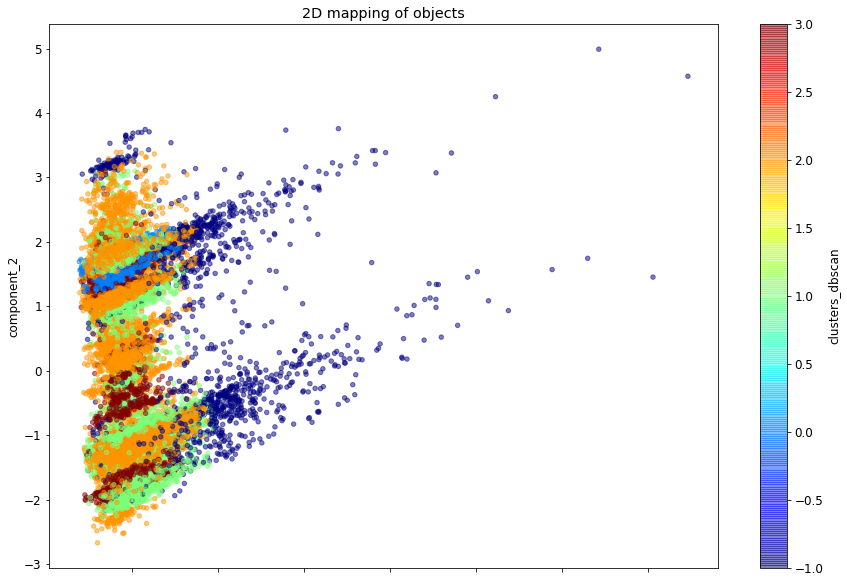

In [239]:
display_components_in_2D_space(components_2d, db_labels)

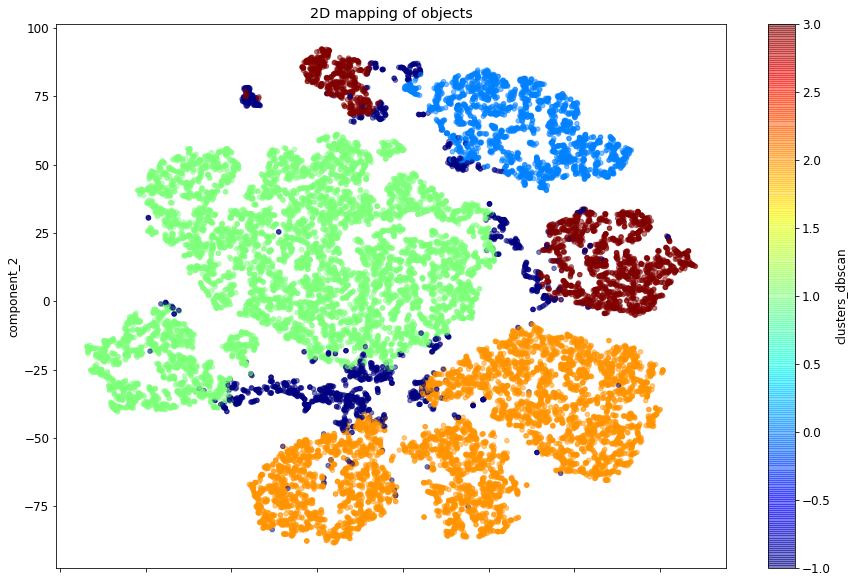

In [109]:
display_components_in_2D_space(tsne_components_2d, db_labels)

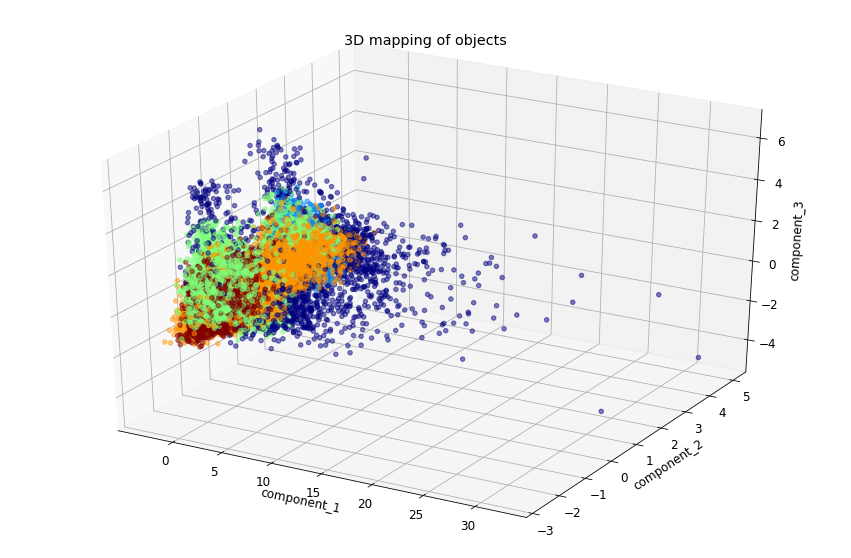

In [110]:
display_components_in_3D_space(components_3d, db_labels)

### Добавление новых признаков

In [111]:
db_labels.unique()

array([ 0, -1,  1,  2,  3], dtype=int64)

In [123]:
df_dbscan = pd.concat([db_labels, df_gmm], 
                   axis=1)
df_dbscan.head()

clusters_dbscan  longitude  latitude  housing_median_age  total_rooms  \
0                0  -1.328086  1.052685            0.998344    -0.804819   
1               -1  -1.323093  1.043321           -0.620471     2.045890   
2                0  -1.333075  1.038638            1.888691    -0.535746   
3                0  -1.338067  1.038638            1.888691    -0.624215   
4                0  -1.338067  1.038638            1.888691    -0.462404   

   total_bedrooms  population  households  median_income  <1H OCEAN  ...  \
0       -0.972476   -0.978955   -0.977033       2.344766          0  ...   
1        1.357143    0.878259    1.669961       2.332238          0  ...   
2       -0.827024   -0.823518   -0.843637       1.782699          0  ...   
3       -0.719723   -0.768132   -0.733781       0.932967          0  ...   
4       -0.612423   -0.761878   -0.629157      -0.012881          0  ...   

   gmm_10_1  gmm_10_2  gmm_10_3  gmm_10_4  gmm_10_5  gmm_10_6  gmm_10_7  \
0         0         0         0         0         1         0         0   
1         0         0         0         0         1         0         0   
2         0         0         0         0         1         0         0   
3         0         0         0         0         1         0         0   
4         0         0         0         0         1         0         0   

   gmm_10_8  gmm_10_9  median_house_value  
0         0         0            452600.0  
1         0         0            358500.0  
2         0         0            352100.0  
3         0         0            341300.0  
4         0         0            342200.0  

[5 rows x 30 columns]

### Сохранение расширенного обучающего датасета

In [106]:
# df_ext.to_csv(TRAIN_DATASET_EXT_PATH, index=False, encoding='utf-8')

### Разбиение на train и test

In [124]:
X = df_dbscan.iloc[:, :-1]
y = df_dbscan.iloc[:, -1]

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=21)

### Переобучение и оценка финальной модели

In [126]:
final_model = GradientBoostingRegressor(n_estimators=400, max_depth=7, random_state=21)
final_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=7,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=21, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

R2:	0.98
MAE:	12078.52
MSE:	264294177.348


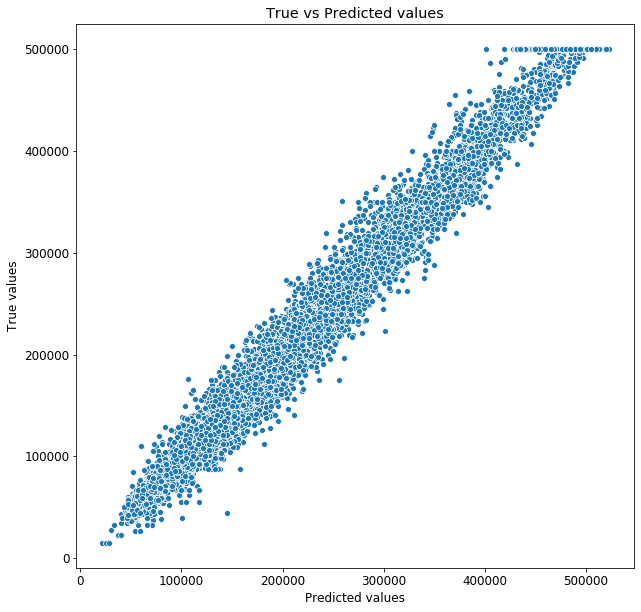

In [127]:
y_train_preds = final_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.833
MAE:	31130.687
MSE:	2251065301.395


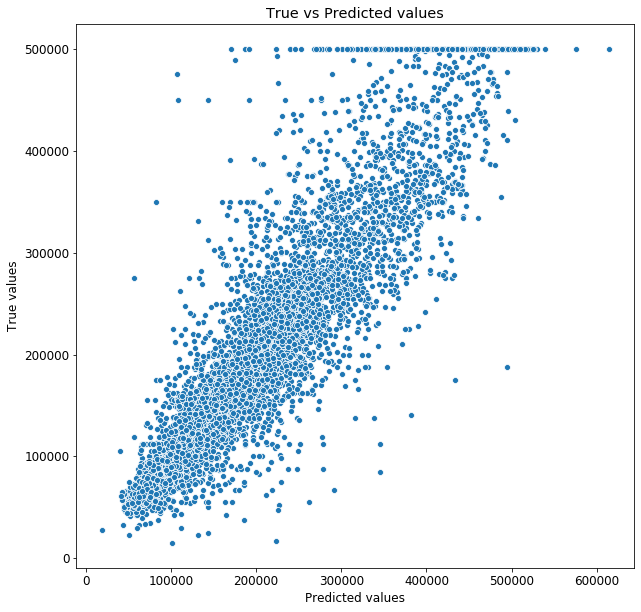

In [128]:
y_test_preds = final_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

In [129]:
feature_importances = pd.DataFrame(zip(X_train.columns, final_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

feature_name  importance
8        median_income    0.490041
10              INLAND    0.135058
1            longitude    0.102079
2             latitude    0.090469
3   housing_median_age    0.047497
6           population    0.037763
5       total_bedrooms    0.023651
4          total_rooms    0.023549
7           households    0.023111
0      clusters_dbscan    0.005996
23            gmm_10_4    0.005114
13          NEAR OCEAN    0.002923
18             gmm_5_3    0.002694
21            gmm_10_2    0.001627
9            <1H OCEAN    0.001116
19             gmm_5_4    0.001073
12            NEAR BAY    0.000998
16             gmm_5_1    0.000802
28            gmm_10_9    0.000716
14             gmm_3_1    0.000588
25            gmm_10_6    0.000581
24            gmm_10_5    0.000524
26            gmm_10_7    0.000502
15             gmm_3_2    0.000499
11              ISLAND    0.000430
17             gmm_5_2    0.000276
22            gmm_10_3    0.000221
27            gmm_10_8    0.000092
20            gmm_10_1    0.000010

In [130]:
results['cluster_type'] = pd.Series('DBSCAN')
results['train_r2'] = round(r2(y_train, y_train_preds), 3)
results['test_r2'] = round(r2(y_test, y_test_preds), 3)

In [131]:
report = report.append(results)
report

cluster_type  train_r2  test_r2
0         none     0.979    0.831
0       kmeans     0.981    0.830
0          pca     0.981    0.831
0           km     0.979    0.833
0          gmm     0.980    0.836
0       DBSCAN     0.980    0.833

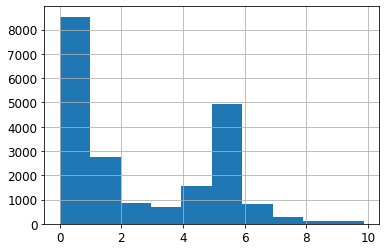

In [145]:
df['LS'] = np.sqrt((df['longitude'] + 118.2437)**2 + (df['latitude'] - 34.0522)**2)
df['LS'].hist()

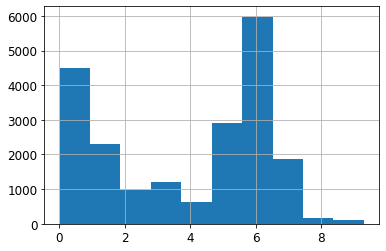

In [146]:
df['SF'] = np.sqrt( (df['longitude'] + 122.4194)**2 + (df['latitude'] - 37.7749)**2 )
df['SF'].hist()

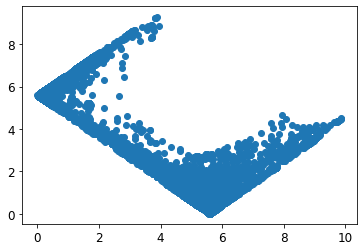

In [148]:
plt.scatter(df['LS'], df['SF'])

longitude   latitude  housing_median_age  total_rooms  total_bedrooms  \
0     -122.230003  37.880001                41.0        880.0           129.0   
1     -122.220001  37.860001                21.0       7099.0          1106.0   
2     -122.239998  37.849998                52.0       1467.0           190.0   
3     -122.250000  37.849998                52.0       1274.0           235.0   
4     -122.250000  37.849998                52.0       1627.0           280.0   
...           ...        ...                 ...          ...             ...   
20635 -121.089996  39.480000                25.0       1665.0           374.0   
20636 -121.209999  39.490002                18.0        697.0           150.0   
20637 -121.220001  39.430000                17.0       2254.0           485.0   
20638 -121.320000  39.430000                18.0       1860.0           409.0   
20639 -121.239998  39.369999                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  <1H OCEAN  \
0           322.0       126.0         8.3252            452600.0          0   
1          2401.0      1138.0         8.3014            358500.0          0   
2           496.0       177.0         7.2574            352100.0          0   
3           558.0       219.0         5.6431            341300.0          0   
4           565.0       259.0         3.8462            342200.0          0   
...           ...         ...            ...                 ...        ...   
20635       845.0       330.0         1.5603             78100.0          0   
20636       356.0       114.0         2.5568             77100.0          0   
20637      1165.0       433.0         1.7000             92300.0          0   
20638       741.0       349.0         1.8672             84700.0          0   
20639      1387.0       530.0         2.3886             89400.0          0   

       INLAND  ISLAND  NEAR BAY  NEAR OCEAN        LS        SF  
0           0       0         1           0  5.526543  0.216604  
1           0       0         1           0  5.505481  0.216799  
2           0       0         1           0  5.513045  0.194486  
3           0       0         1           0  5.520300  0.185300  
4           0       0         1           0  5.520300  0.185300  
...       ...     ...       ...         ...       ...       ...  
20635       1       0         0           0  6.128818  2.162100  
20636       1       0         0           0  6.194241  2.098624  
20637       1       0         0           0  6.146471  2.043995  
20638       1       0         0           0  6.195511  1.986967  
20639       1       0         0           0  6.103834  1.983767  

[20640 rows x 16 columns]

In [164]:
X = df.drop(['median_house_value'], axis = 1)
y = df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=21)
final_model = GradientBoostingRegressor(n_estimators=400, max_depth=7, random_state=21)
final_model.fit(X_train, y_train)
y_train_preds = final_model.predict(X_train)
y_test_preds = final_model.predict(X_test)
feature_importances = pd.DataFrame(zip(X_train.columns, final_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

feature_name  importance
7        median_income    0.486912
9               INLAND    0.139458
14                  SF    0.074609
1             latitude    0.068937
13                  LS    0.049162
0            longitude    0.045827
2   housing_median_age    0.033861
5           population    0.033021
4       total_bedrooms    0.020472
3          total_rooms    0.019516
6           households    0.018338
12          NEAR OCEAN    0.006206
8            <1H OCEAN    0.002387
10              ISLAND    0.000849
11            NEAR BAY    0.000446

In [165]:
results['cluster_type'] = pd.Series('LS SF')
results['train_r2'] = round(r2(y_train, y_train_preds), 3)
results['test_r2'] = round(r2(y_test, y_test_preds), 3)
report = report.append(results)
report

cluster_type  train_r2  test_r2
0         none     0.979    0.831
0       kmeans     0.981    0.830
0          pca     0.981    0.831
0           km     0.979    0.833
0          gmm     0.980    0.836
0       DBSCAN     0.980    0.833
0        LS SF     0.981    0.836